In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

colour_pal = sns.color_palette()

In [2]:
df = pd.read_csv("..\\data\\data_for_analysis\\actuals_1.csv")
df2 = pd.read_csv("..\\data\\data_for_analysis\\actuals_2.csv")

# Create an overall dataset
df = pd.concat([df, df2], axis=0)
df = df.set_index("Time")

# Create a dataset with just "Time" and "Load (kW)"
df_load = df.iloc[:, 0].to_frame()

# Save the datasets to CSV files
df.to_csv("..\\data\\data_for_analysis\\df.csv")
df_load.to_csv("..\\data\\data_for_analysis\\df_load.csv")

In [3]:
df

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
Time,,,,,,,
2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.250,6.25375
2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.000,9.20500
2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.000,11.28375
2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.000,7.16875
2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.250,0.78000
...,...,...,...,...,...,...,...
2021-01-15 19:00:00,1.141079e+06,1013.38750,38.375,68.333333,11.734386,306.875,6.63375
2021-01-15 20:00:00,1.108896e+06,1013.97500,28.125,73.916667,9.056886,297.625,10.08750
2021-01-15 21:00:00,1.078978e+06,1014.18750,21.125,75.833333,8.414386,334.000,8.18000


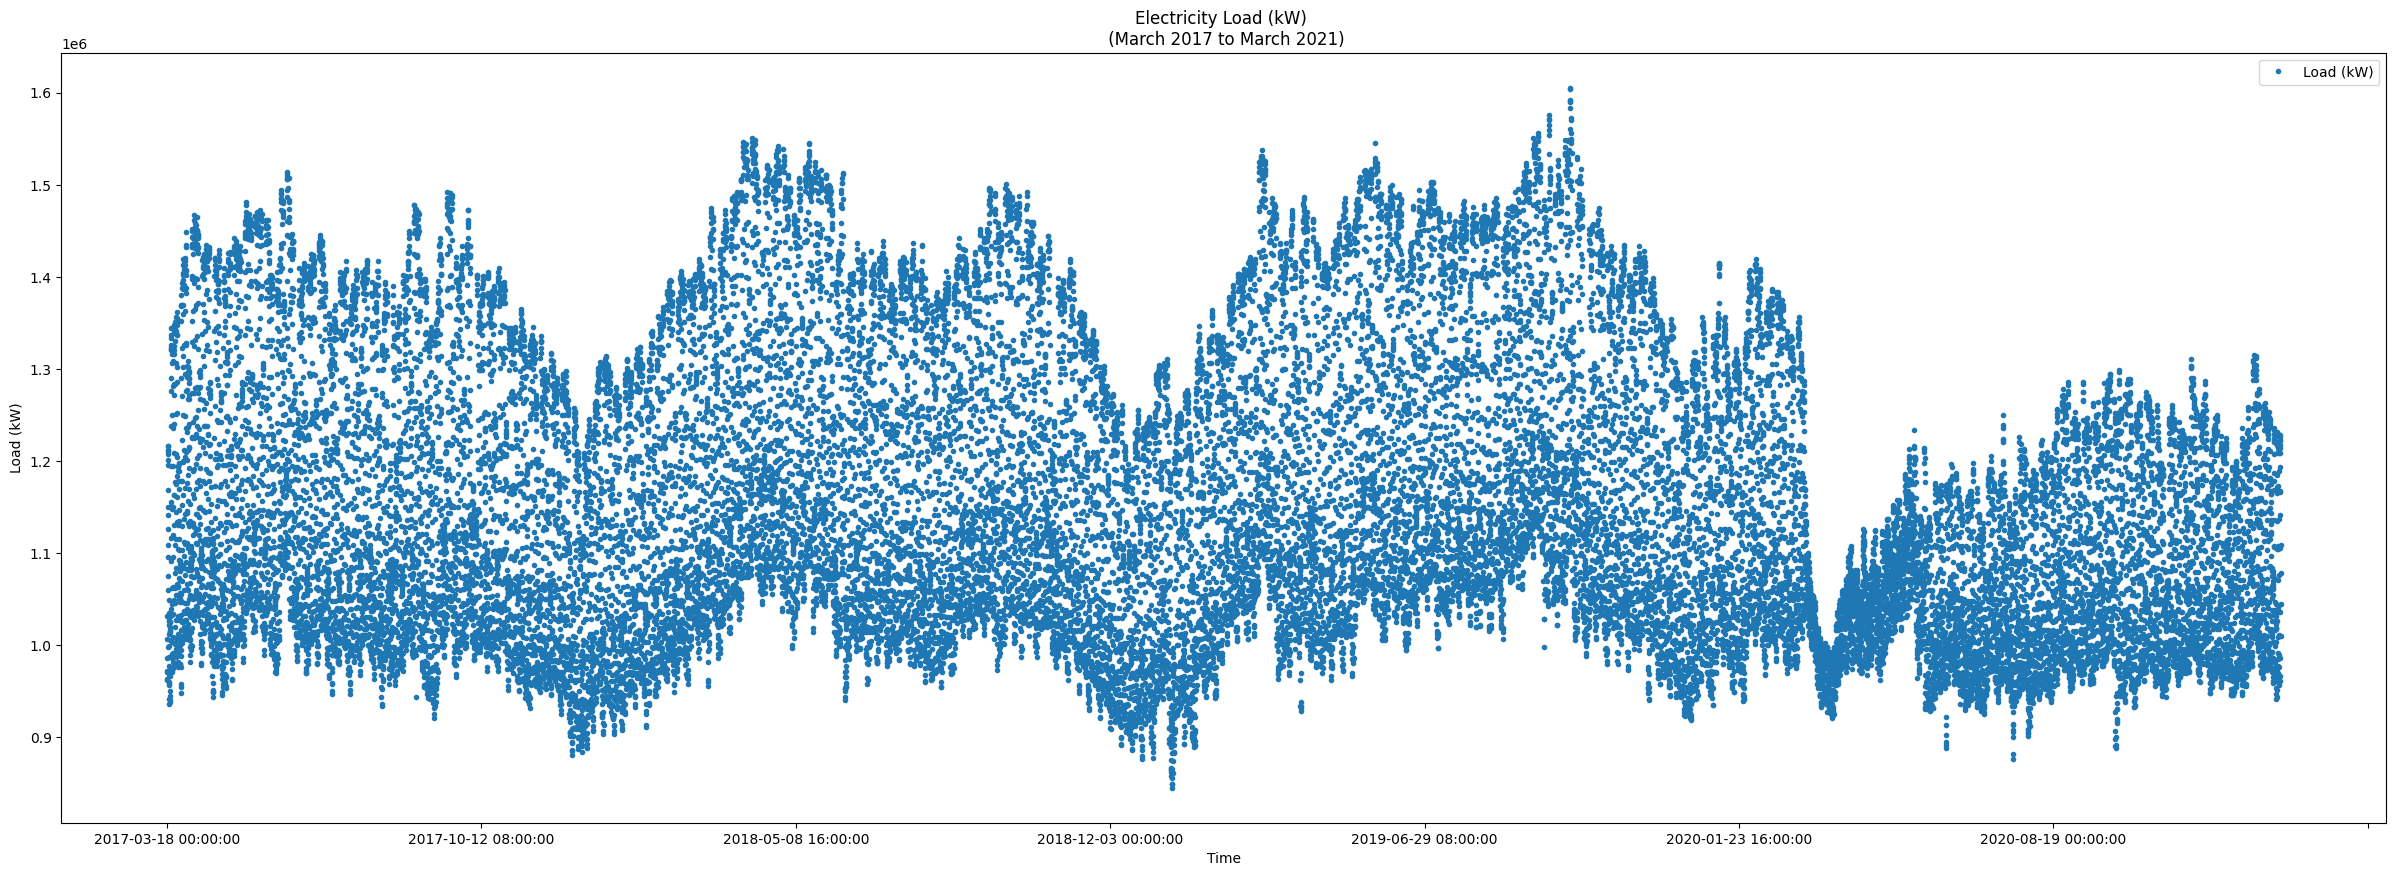

In [4]:
df_load.plot(style = ".", 
             figsize = (30, 10), 
             color = colour_pal, 
             title = "Electricity Load (kW) \n (March 2017 to March 2021)",
             ylabel = "Load (kW)")

plt.show()

### Observing Load : Overall
- We observe from above that the following dataset is clearly seasonal. During the last few months of each year there is a great decrease in electricity demand and load overall in the city. It is also important to note that these drops begin just before the end of the year and begin to reach their peaks again towards the end of the summer months. This signified that there is a surge in load over the colder months of the year, indicating that this may be due to the use greater use of heaters and other winter related appliances. 

- What is also visible is that there is a significant decrease in electricity demand in the first quarter of the year 2020, this is the time where the COVID-19 pandemic hit Australia. The pandemic led to industries being forced to shut down and the inclusion of remote work for workers to comply to COVID-19 protocols. This signifies that this area may be in an industrialised. This insight is further supported by observing that where there is supposed to be a peak in load with respect to previous data, there is actually a trough.

### Observing Load : Over Different Periods

In [5]:
def create_features(input_df):
    """
    Creating specific time segments from datetime.
    """
    # Convert the index to a DatetimeIndex if it's not already
    input_df.index = pd.to_datetime(input_df.index)
    
    input_df["hour"] = input_df.index.hour
    input_df["dayofweek"] = input_df.index.day_of_week #Monday = 0, Sunday = 6
    input_df["quarter"] = input_df.index.quarter
    input_df["month"] = input_df.index.month
    input_df["year"] = input_df.index.year

    return input_df

df_load_dt = df_load.copy()
df_load_dt = create_features(df_load_dt)
df_load_dt.to_csv("..\\data\\data_for_analysis\\df_load_dt.csv")

In [6]:
df_load_dt

,Load (kW),hour,dayofweek,quarter,month,year
Time,,,,,,
2017-03-18 00:00:00,1.031472e+06,0,5,1,3,2017
2017-03-18 01:00:00,1.007206e+06,1,5,1,3,2017
2017-03-18 02:00:00,9.861084e+05,2,5,1,3,2017
2017-03-18 03:00:00,9.707610e+05,3,5,1,3,2017
2017-03-18 04:00:00,9.622584e+05,4,5,1,3,2017
...,...,...,...,...,...,...
2021-01-15 19:00:00,1.141079e+06,19,4,1,1,2021
2021-01-15 20:00:00,1.108896e+06,20,4,1,1,2021
2021-01-15 21:00:00,1.078978e+06,21,4,1,1,2021


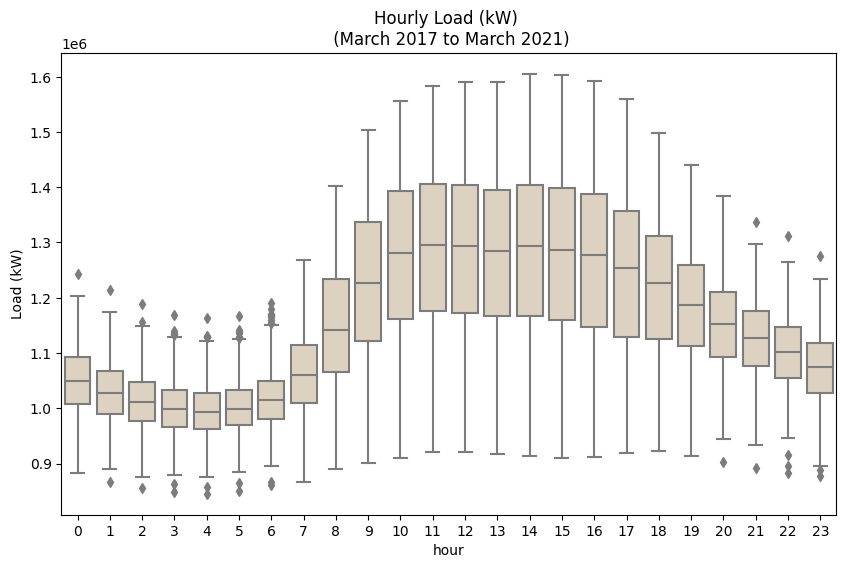

In [7]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "hour", y = 'Load (kW)', color = "#E1D3BE")
plt.title("Hourly Load (kW) \n (March 2017 to March 2021)")
plt.show()

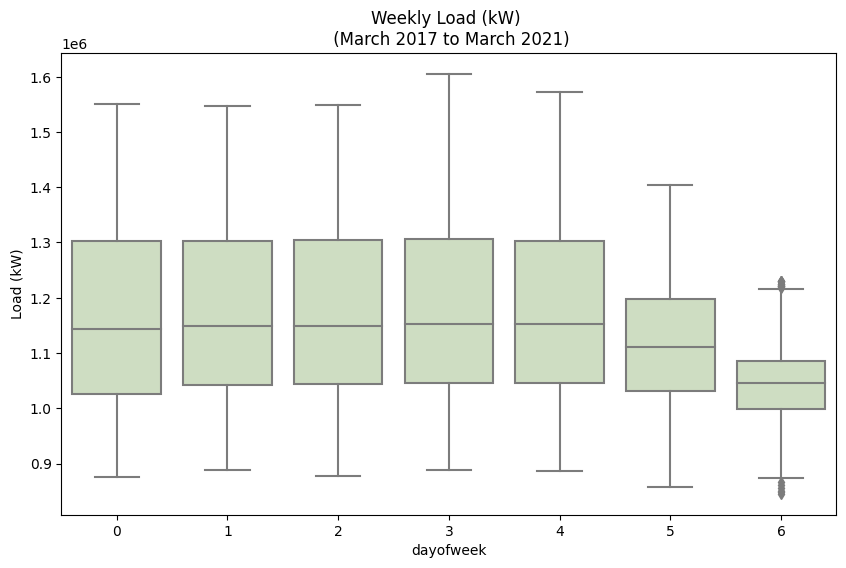

In [8]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "dayofweek", y = 'Load (kW)', color = "#CEE1BE")
plt.title("Weekly Load (kW) \n (March 2017 to March 2021)")
plt.show()

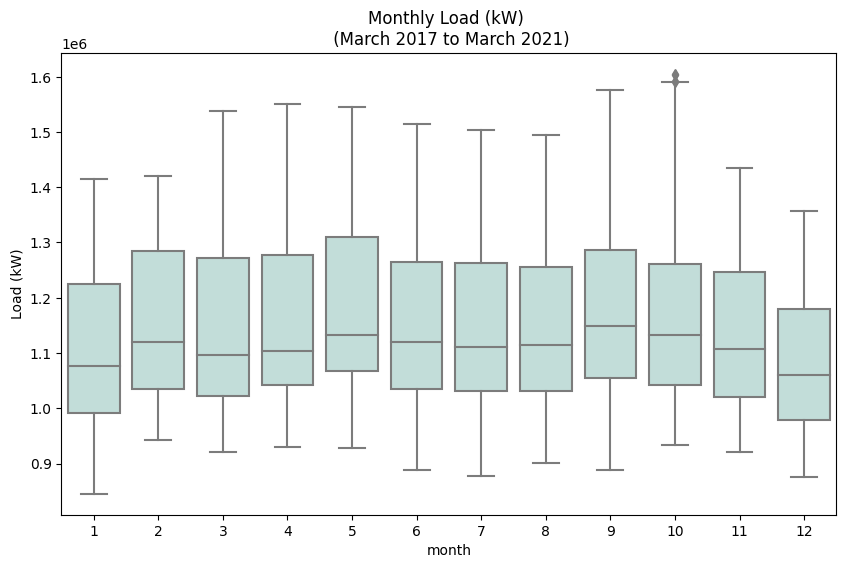

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "month", y = 'Load (kW)', color = "#BEE1DC")
plt.title("Monthly Load (kW) \n (March 2017 to March 2021)")
plt.show()

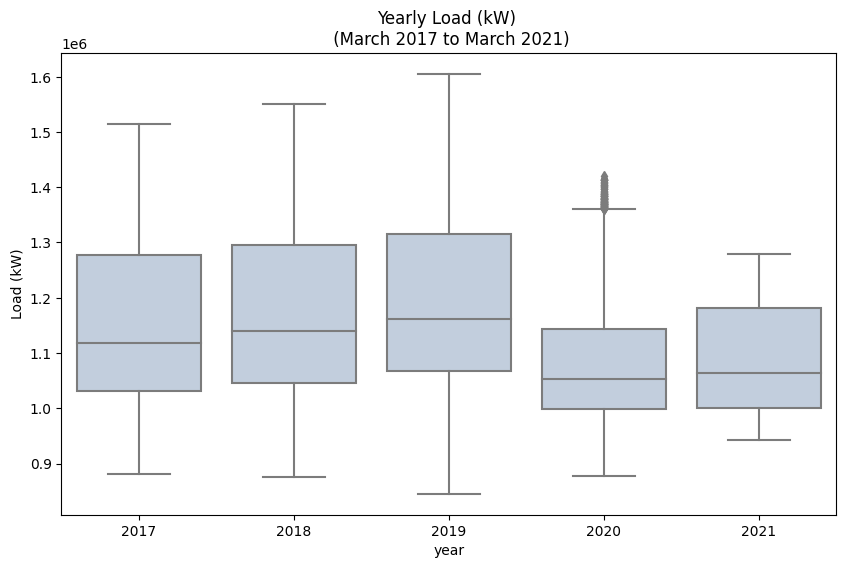

In [10]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_load_dt, x = "year", y = 'Load (kW)', color = "#BECDE1")
plt.title("Yearly Load (kW) \n (March 2017 to March 2021)")
plt.show()

- From the hourly mapping we observe that there is a significant increase in load between the working hours of the day and a drop before and after those hours. In addition, it can be clearly seen that there is a significant lower load during the weekends as compared to the weekdays. Furthermore, the load within the first three years of the dataset is significantly greater as specified by the higher medians of the load overall, therefore, the area was significantly impacted by the pandemic and lowered load over those years. Ultimately, we found further evidence to support our hypothesis that this city is based within an industrialised area. 

- Since we believe this city was an industrial city we expect that there will be a significant differences between the correlations of the load between the pre-covid and during covid times. Specifically, we expect there to be lower correlation between the dataset during covid.


### Finding Correlations

In [11]:
#Calculate correlation between "Load (kW)" and other attributes
df.corr()["Load (kW)"]

Load (kW)               1.000000
Pressure_kpa           -0.061818
Cloud Cover (%)         0.022896
Humidity (%)           -0.163588
Temperature (C)         0.566274
Wind Direction (deg)    0.333841
Wind Speed (kmh)        0.463438
Name: Load (kW), dtype: float64

In [12]:
#Divide the dataset into two groups based on years, pre-covid and during covid
df_2017_to_2019 = df[(df.index >= pd.to_datetime("2017-01-01")) & (df.index <= pd.to_datetime("2017-01-01"))]
df_2020_to_2021 = df[(df.index >= pd.to_datetime("2020-01-01")) & (df.index <= pd.to_datetime("2021-12-31"))]

#Calculate correlation between Load and other attributes for each group
correlation_2017_to_2019 = df_2017_to_2019.corr()["Load (kW)"]
correlation_2020_to_2021 = df_2020_to_2021.corr()["Load (kW)"]

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

In [71]:
correlation_2017_to_2019

Load (kW)               1.000000
Pressure_kpa           -0.158593
Cloud Cover (%)         0.088367
Humidity (%)           -0.080195
Temperature (C)         0.618755
Wind Direction (deg)    0.352385
Wind Speed (kmh)        0.514116
Name: Load (kW), dtype: float64

In [72]:
correlation_2020_to_2021

Load (kW)               1.000000
Pressure_kpa            0.231971
Cloud Cover (%)        -0.165281
Humidity (%)           -0.489302
Temperature (C)         0.394979
Wind Direction (deg)    0.261711
Wind Speed (kmh)        0.220346
Name: Load (kW), dtype: float64

- As expected the correlation did decrease when the city countered COVID-19, therefore, we will need to take this into account when creating a forecasting model to ensure an accurate outcome.

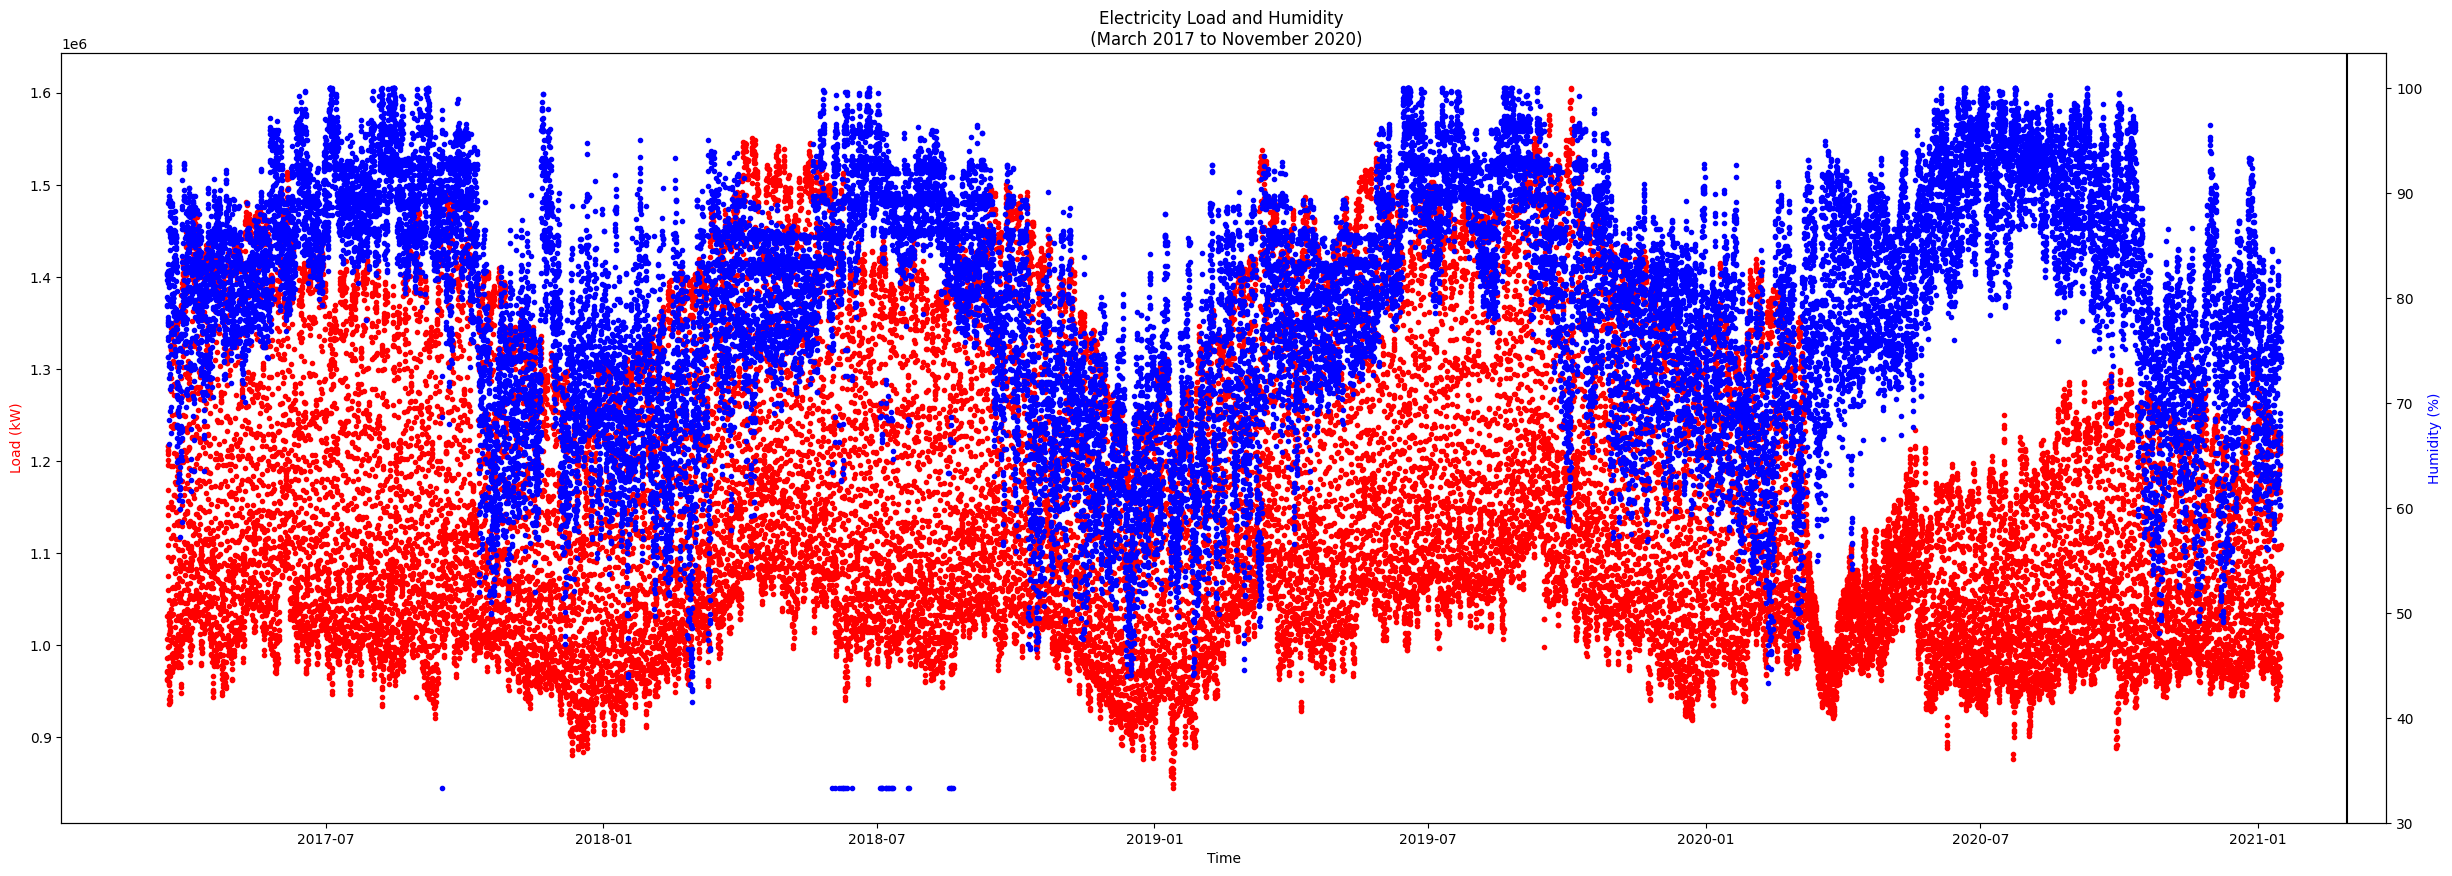

In [84]:
#Create a figure and axis
fig, ax1 = plt.subplots(figsize=(30, 10))

# First y-axis consists of load
ax1.plot(df.index, df["Load (kW)"], '.', color = "red")
ax1.set_xlabel("Time")
ax1.set_ylabel("Load (kW)", color = "red")

#Right side y-axis
ax2 = ax1.twinx()

#Humidity on the second y-axis
ax2.plot(df.index, df["Humidity (%)"], '.', color = "blue")
ax2.set_ylabel("Humidity (%)", color = "blue")

# Set the title
plt.title("Electricity Load and Humidity \n (March 2017 to November 2020)")
plt.show()

- We observe from above that there is a clear correlation between the humidity and the overall load that present over the pre-covid area, whereas, there is very little correlation between these two attributes once the wave of covid hit Australia.

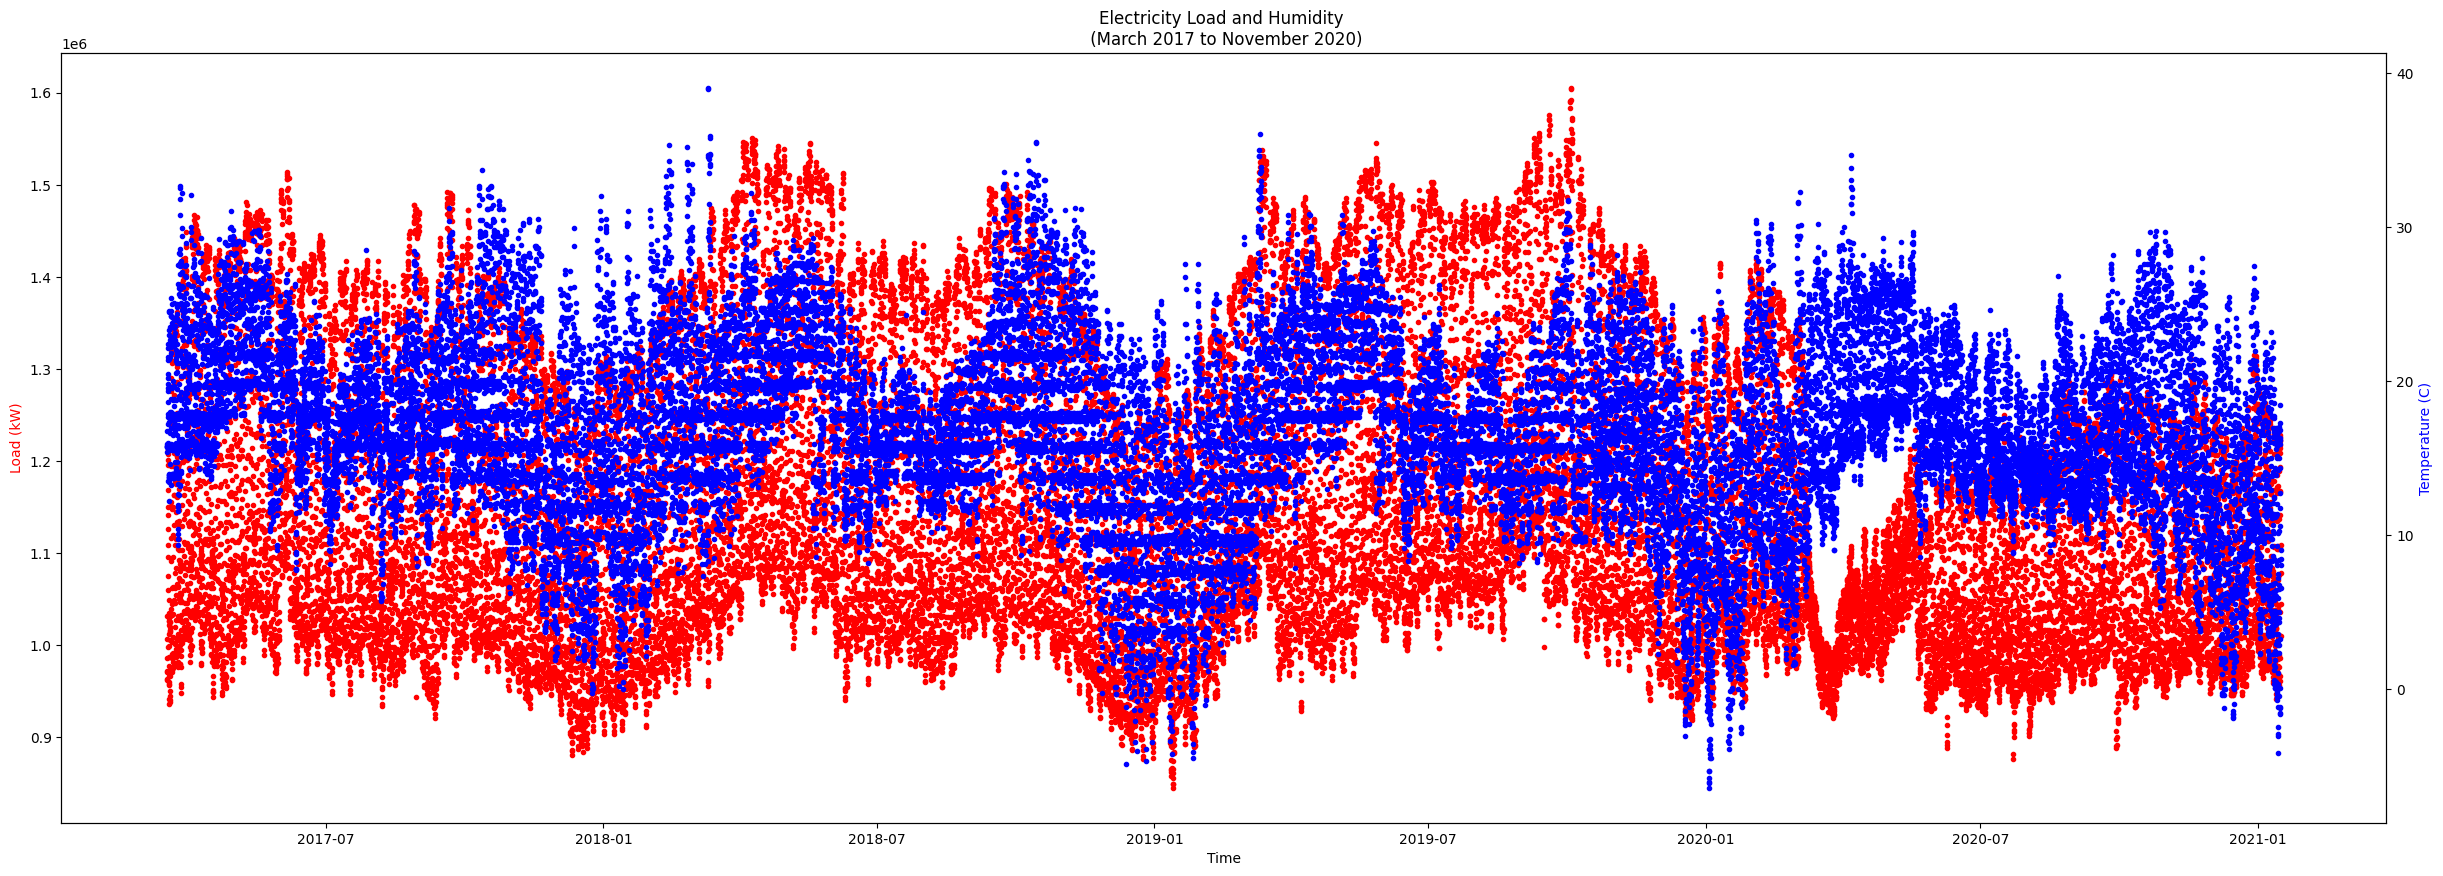

In [85]:
#Create a figure and axis
fig, ax1 = plt.subplots(figsize=(30, 10))

# First y-axis consists of load
ax1.plot(df.index, df["Load (kW)"], '.', color = "red")
ax1.set_xlabel("Time")
ax1.set_ylabel("Load (kW)", color = "red")

#Right side y-axis
ax2 = ax1.twinx()

#Humidity on the second y-axis
ax2.plot(df.index, df["Temperature (C) "], '.', color = "blue")
ax2.set_ylabel("Temperature (C)", color = "blue")

# Set the title
plt.title("Electricity Load and Humidity \n (March 2017 to November 2020)")
plt.show()

- There is a highly significant correlation present between the temperature and the humidity values which seems to carry out through both the pre-covid and during covid era. We observe that after the initial hit of covid in march 2021, the temperature and load seem to fall back into having greater correlation.

### Creating a Model : Simple Moving Day Average

In [ ]:
# Split the data into training and test sets (75% for training)
train_size = int(len(df) * 0.75)
train_data = df["Load (kW)"].iloc[:train_size]
test_data = df["Load (kW)"].iloc[train_size:]